# Healthcare - Persistency of a drug Group Project

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification. 

The main objective is to build a classification model to predict the NTM drug persistence of patients based on several factors.


## Data Import

In [85]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [86]:
df = pd.read_csv('data/Healthcare_dataset.csv')

In [87]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [89]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [90]:
df_info = pd.read_csv('data/Healthcare_info.csv')

In [91]:
df_info = df_info[['Variable', 'Variable Description']]

In [92]:
# Variables in the dataset
pd.set_option('display.max_colwidth', None)
df_info

,Variable,Variable Description
0,Patient ID,Unique ID of each patient
1,Persistency_Flag,Flag indicating if a patient was persistent or not
2,Age,Age of the patient during their therapy
3,Race,Race of the patient from the patient table
4,Region,Region of the patient from the patient table
5,Ethnicity,Ethnicity of the patient from the patient table
6,Gender,Gender of the patient from the patient table
7,IDN Indicator,Flag indicating patients mapped to IDN
8,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,NTM - T-Score,T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate)


In [93]:
df.Tscore_Bucket_Prior_Ntm.value_counts()

>-2.5     1951
<=-2.5    1473
Name: Tscore_Bucket_Prior_Ntm, dtype: int64

## Data Preprocessing

In [94]:
df['Idn_Indicator'].value_counts()

Y    2557
N     867
Name: Idn_Indicator, dtype: int64

In [95]:
len(df['Injectable_Experience_During_Rx'].unique())

2

In [96]:
cols = df.columns

In [97]:
# check boolean cloumns
bool_cols = []
other_cols = []
for i in cols:
    values = df[i].unique()
    if len(values) == 2 and (values[0] == 'Y' or values[0] == 'N'):
        bool_cols.append(i)
    else:
        other_cols.append(i)
bool_cols

['Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
 'Concom_Narcotics',
 'Concom_S

In [98]:
df[other_cols].drop('Persistency_Flag', axis=1)

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Dexa_Freq_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Count_Of_Risks
0,P1,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,0
1,P2,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,0
2,P3,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,2
3,P4,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,1
4,P5,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,1
3420,P3421,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Non-Adherent,0
3421,P3422,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,7,VLR_LR,>-2.5,HR_VHR,<=-2.5,No change,Worsened,Adherent,1
3422,P3423,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,0,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,0


In [99]:
df.select_dtypes(exclude='object').describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


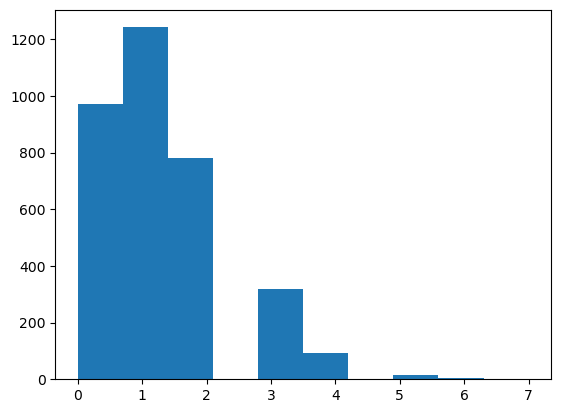

In [100]:
plt.hist(x=df['Count_Of_Risks'])

plt.show()

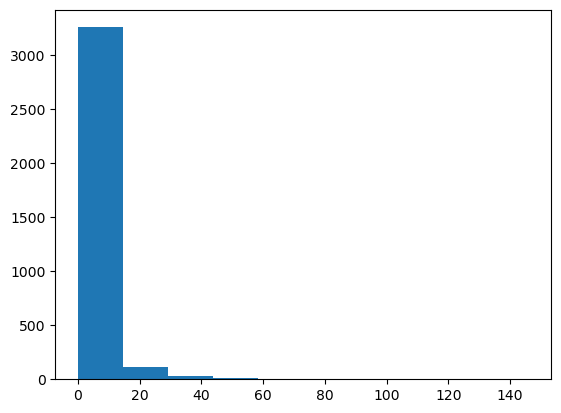

In [101]:
plt.hist(x=df['Dexa_Freq_During_Rx'])

plt.show()

In [102]:
df.Age_Bucket.value_counts()

>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64

## Exploratory Data Analysis

In [103]:
df.Gender.value_counts()

Female    3230
Male       194
Name: Gender, dtype: int64

In [20]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [21]:
df['Persistency_Flag'].value_counts()

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

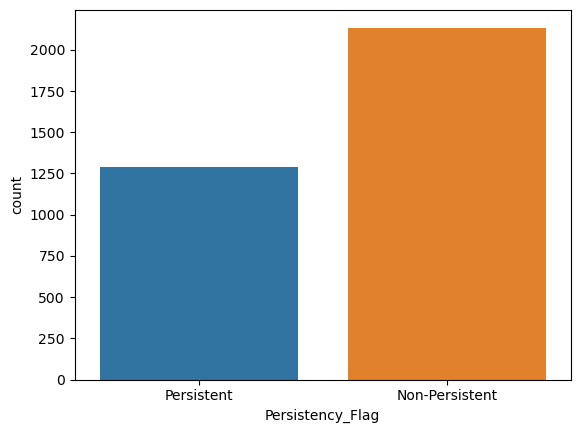

In [22]:
sns.countplot(data=df, x='Persistency_Flag')
plt.show() 

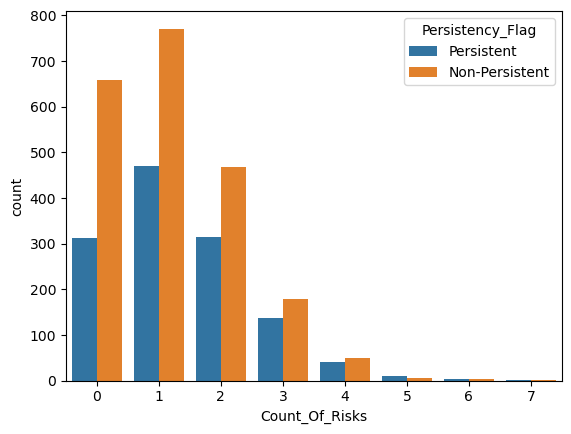

In [23]:
sns.countplot(data=df, x='Count_Of_Risks', hue='Persistency_Flag')
plt.show() 

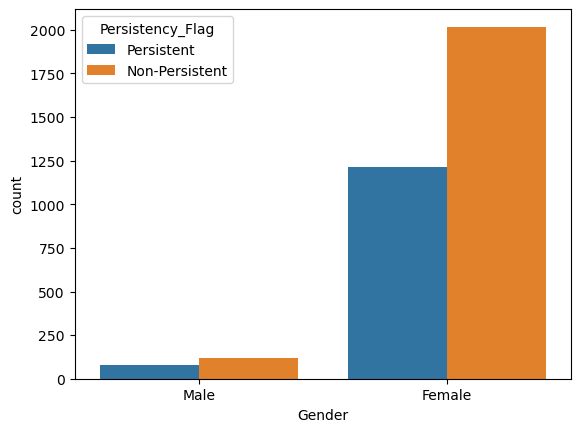

In [24]:
sns.countplot(data=df, x='Gender', hue='Persistency_Flag')
plt.show() 

There is a huge distinction between the number of Male and Female patients, we will recommend not use this feature or weight it less.

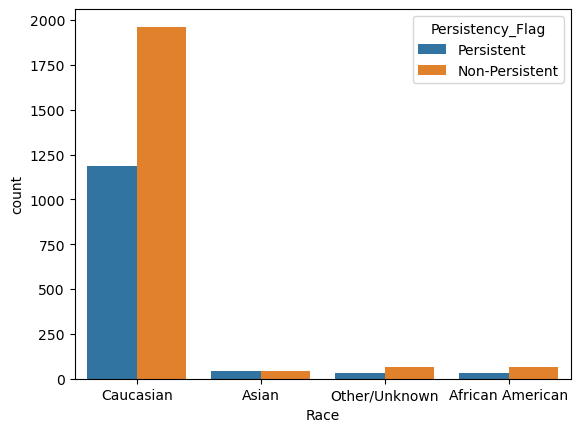

In [25]:
sns.countplot(data=df, x='Race', hue='Persistency_Flag')
plt.show()

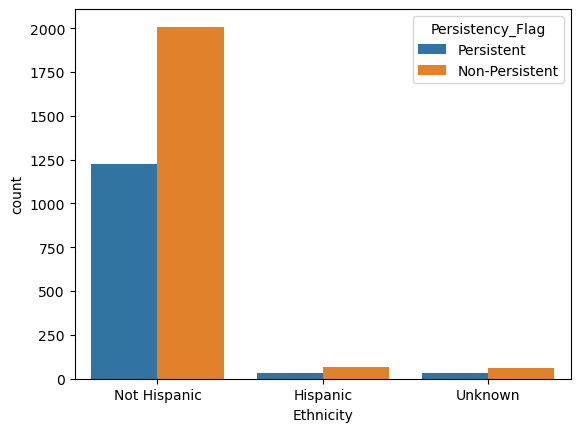

In [26]:
sns.countplot(data=df, x='Ethnicity', hue='Persistency_Flag')
plt.show()

Again, Race and Ethnicity groups are not balanced in the dataset, one way is that we can group other groups together into a new bigger group.

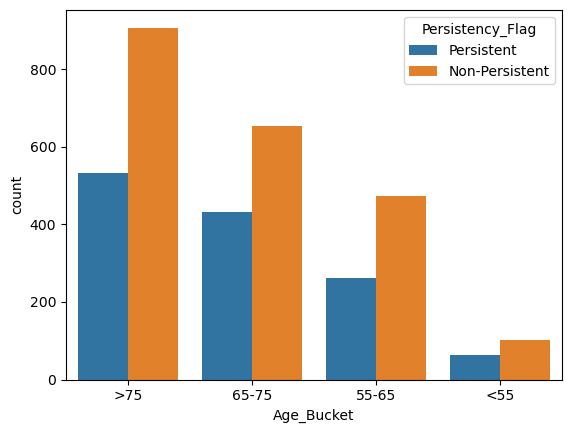

In [27]:
sns.countplot(data=df, x='Age_Bucket', hue='Persistency_Flag', order=['>75','65-75','55-65','<55'])
plt.show()

As expected, there are more older pepole in the dataset than people who are younger than 55

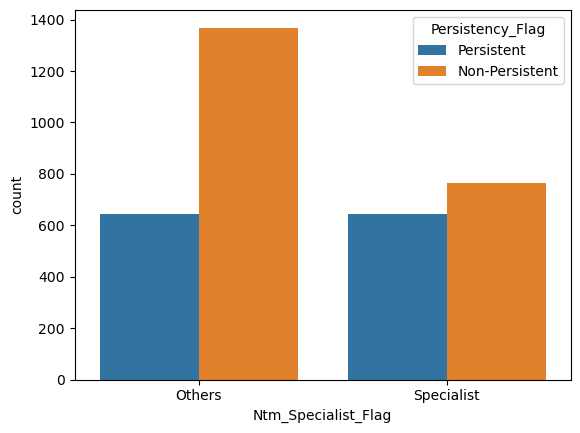

In [28]:
sns.countplot(data=df, x='Ntm_Specialist_Flag', hue='Persistency_Flag')
plt.show()

In [29]:
len(bool_cols)

50

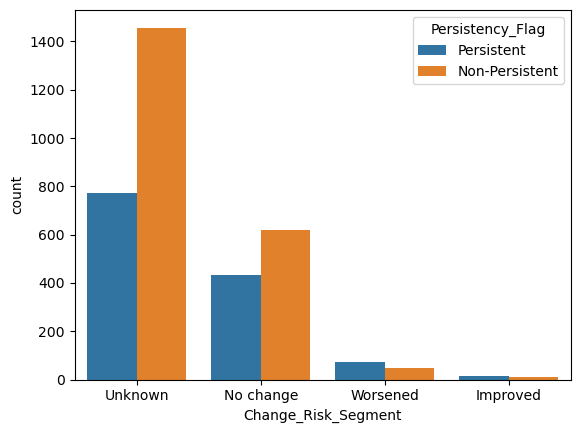

In [106]:
sns.countplot(data=df, x='Change_Risk_Segment', hue='Persistency_Flag')
plt.show()

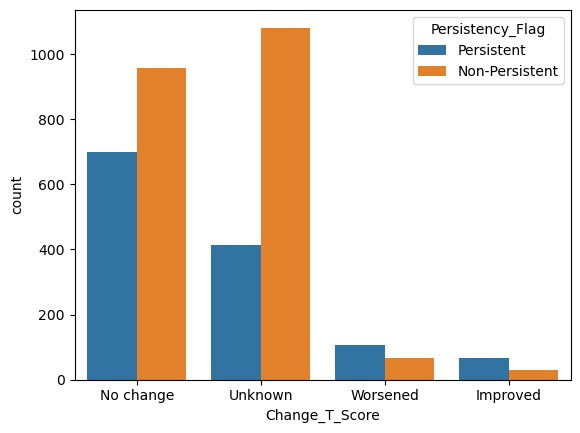

In [105]:
sns.countplot(data=df, x='Change_T_Score', hue='Persistency_Flag')
plt.show()

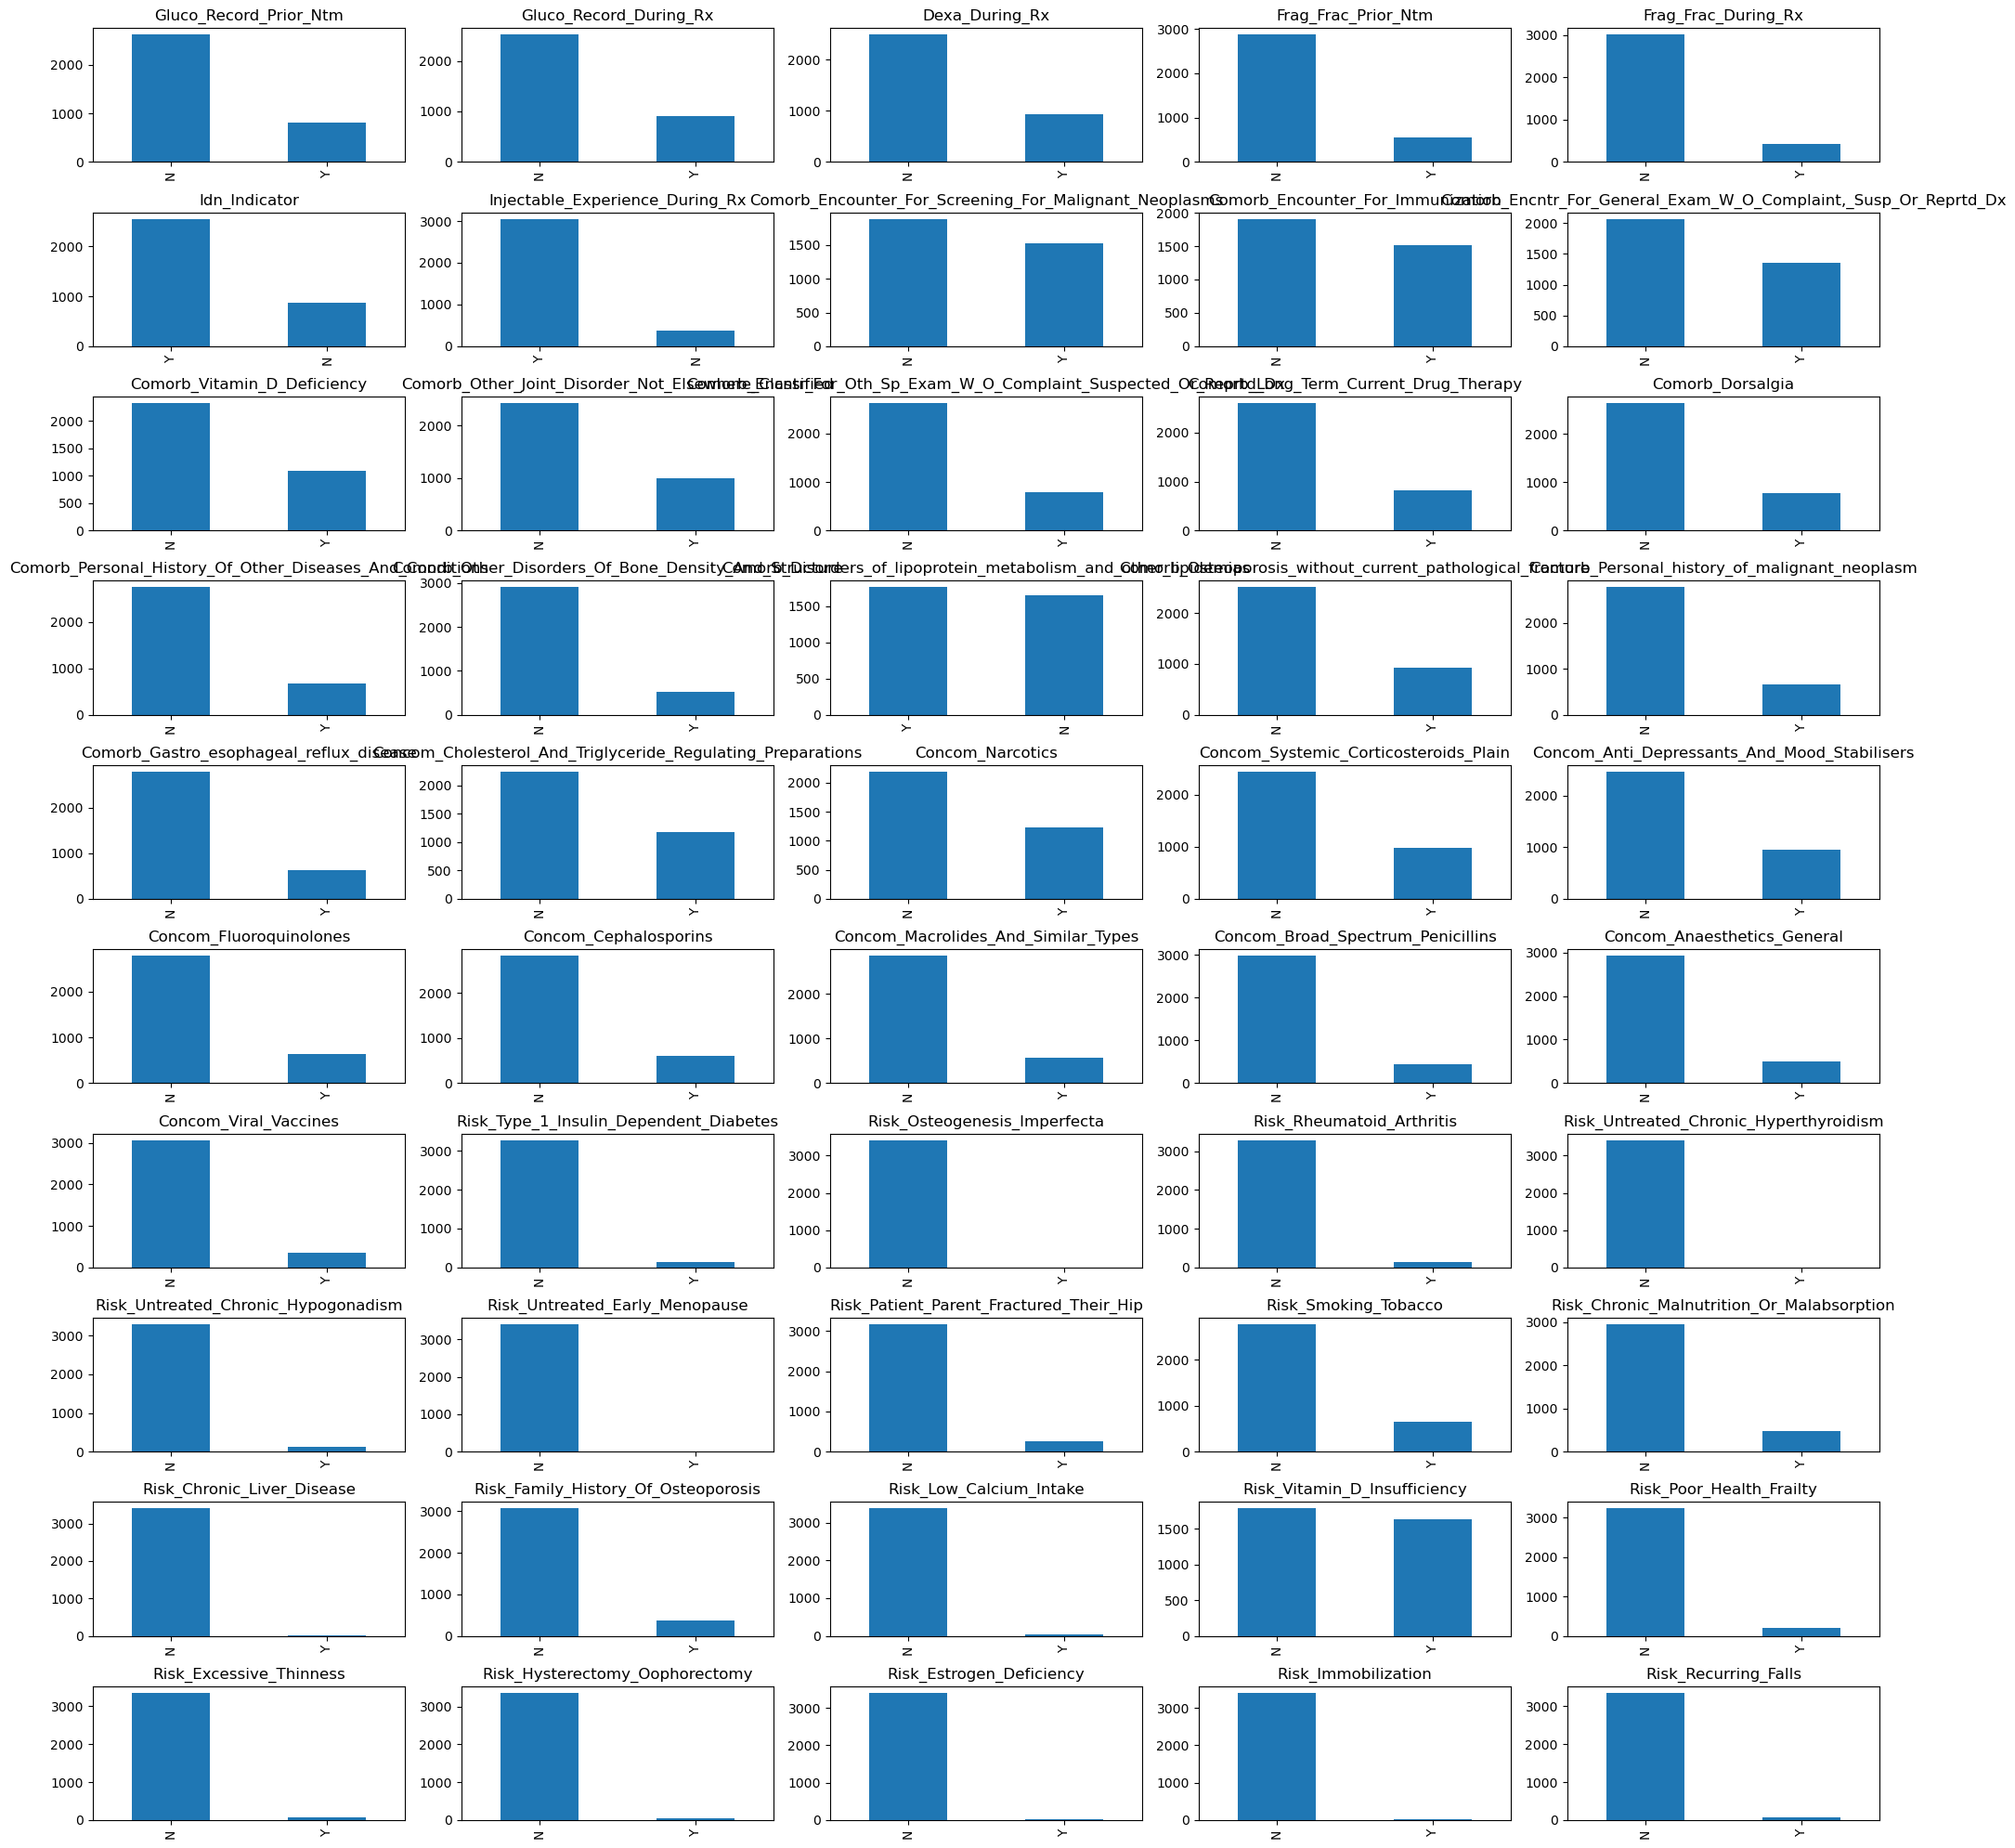

In [30]:
fig = plt.figure(figsize = (20,20))

i = 1
for col in bool_cols:
    plt.subplot(10, 5, i)
    df[col].value_counts().plot(kind='bar', 
                                     title=col)
    i = i + 1

fig.tight_layout(h_pad=1)
plt.show()

Some of the features have very unbalanced data which should be removed to improve our model performance.

In [31]:
# Locate unbalanced columns
col_drop = []

for col in bool_cols:
    val_n = df[df[col] == 'N'].count()[1]
    val_y = df[df[col] == 'Y'].count()[1]
    if (val_n / val_y) >= 10:
        col_drop.append(col)

In [32]:
col_drop

['Risk_Type_1_Insulin_Dependent_Diabetes',
 'Risk_Osteogenesis_Imperfecta',
 'Risk_Rheumatoid_Arthritis',
 'Risk_Untreated_Chronic_Hyperthyroidism',
 'Risk_Untreated_Chronic_Hypogonadism',
 'Risk_Untreated_Early_Menopause',
 'Risk_Patient_Parent_Fractured_Their_Hip',
 'Risk_Chronic_Liver_Disease',
 'Risk_Low_Calcium_Intake',
 'Risk_Poor_Health_Frailty',
 'Risk_Excessive_Thinness',
 'Risk_Hysterectomy_Oophorectomy',
 'Risk_Estrogen_Deficiency',
 'Risk_Immobilization',
 'Risk_Recurring_Falls']

In [33]:
df = df.drop(col_drop, axis=1)

In [34]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Family_History_Of_Osteoporosis,Risk_Vitamin_D_Insufficiency,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,Y,Y,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,Y,N,N,N,1


In [35]:
for col in col_drop:
    bool_cols.remove(col)

## Data Transformation

In [36]:
from sklearn import preprocessing

In [37]:
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

In [38]:
# cols that have various values
other_cols

['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Dexa_Freq_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Count_Of_Risks']

In [39]:
df[other_cols].head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Dexa_Freq_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,1


In [40]:
# drop unnecessary variables
df = df.drop(['Gender','Region'], axis=1)

In [41]:
# impute unknown value
df.loc[df['Change_Risk_Segment'] == 'Unknown', 'Change_Risk_Segment'] = 'No change'
df.loc[df['Change_T_Score'] == 'Unknown', 'Change_T_Score'] = 'No change'

In [42]:
def label(data, feature):
    data[feature] = label_encoder.fit_transform(data[feature])

In [43]:
def transform_speciality(value):
#     transform medical speciality
    if 'MEDICINE' in value.split(' '):
        return 'MEDICINE'
    elif 'SURGERY' in value.split(' '):
        return 'SURGERY'
    elif df['Ntm_Speciality'].value_counts()[value] < 10 or value == 'Unknown':
        return 'OTHER'
    return value

In [44]:
df['Ntm_Speciality']

0       GENERAL PRACTITIONER
1       GENERAL PRACTITIONER
2       GENERAL PRACTITIONER
3       GENERAL PRACTITIONER
4       GENERAL PRACTITIONER
                ...         
3419    GENERAL PRACTITIONER
3420                 Unknown
3421           ENDOCRINOLOGY
3422                 Unknown
3423                 Unknown
Name: Ntm_Speciality, Length: 3424, dtype: object

In [45]:
# Transform NTM Speciality
df['Ntm_Speciality'] = df['Ntm_Speciality'].apply(lambda x: transform_speciality(x))

In [46]:
# label encoding variables with only two values to 0 and 1
label(df, 'Ntm_Specialist_Flag')
label(df, 'Risk_Segment_Prior_Ntm')
label(df, 'Tscore_Bucket_Prior_Ntm')
label(df, 'Adherent_Flag')

In [47]:
df['Race'].unique()

array(['Caucasian', 'Asian', 'Other/Unknown', 'African American'],
      dtype=object)

In [48]:
df.loc[df['Ethnicity'] != 'Not Hispanic', 'Ethnicity'] = 'Other'
df.loc[df['Race'] != 'Caucasian', 'Race'] = 'Other'

In [49]:
ohe = onehot_encoder.fit(df[['Ethnicity','Age_Bucket','Ntm_Speciality_Bucket',
                                                      'Race','Risk_Segment_During_Rx','Tscore_Bucket_During_Rx',
                                                       'Change_T_Score','Change_Risk_Segment','Ntm_Speciality']])

In [50]:
# one hot encode other features into 0 or 1

new_df = pd.DataFrame(ohe.transform(df[['Ethnicity','Age_Bucket','Ntm_Speciality_Bucket',
                                                      'Race','Risk_Segment_During_Rx','Tscore_Bucket_During_Rx',
                                                       'Change_T_Score','Change_Risk_Segment', 'Ntm_Speciality']] ).toarray(), 
                      columns=ohe.get_feature_names_out())

new_df.head()

,Ethnicity_Not Hispanic,Ethnicity_Other,Age_Bucket_55-65,Age_Bucket_65-75,Age_Bucket_<55,Age_Bucket_>75,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Ntm_Speciality_Bucket_Rheum,Race_Caucasian,...,Ntm_Speciality_MEDICINE,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_OTHER,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY,Ntm_Speciality_UROLOGY
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df = df.join(new_df)

In [52]:
df = df.drop(['Ethnicity','Age_Bucket','Ntm_Speciality_Bucket',
         'Race','Risk_Segment_During_Rx','Tscore_Bucket_During_Rx',
         'Change_T_Score','Change_Risk_Segment','Ntm_Speciality'], axis=1)
df.head()

,Ptid,Persistency_Flag,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,...,Ntm_Speciality_MEDICINE,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_OTHER,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY,Ntm_Speciality_UROLOGY
0,P1,Persistent,0,N,N,0,N,N,N,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,P2,Non-Persistent,0,N,N,0,N,N,N,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,P3,Non-Persistent,0,N,N,0,N,N,N,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,P4,Non-Persistent,0,N,Y,0,N,N,N,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,P5,Non-Persistent,0,Y,Y,0,N,N,N,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# label encode other features
for col in bool_cols:
    label(df, col)

In [54]:
# code target variables
df['target'] = np.where(df['Persistency_Flag'] == 'Persistent', 1, 0)
df['target']

0       1
1       0
2       0
3       0
4       0
       ..
3419    1
3420    1
3421    1
3422    0
3423    0
Name: target, Length: 3424, dtype: int32

In [55]:
df.head()

,Ptid,Persistency_Flag,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,...,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_OTHER,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_SURGERY,Ntm_Speciality_UROLOGY,target
0,P1,Persistent,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,P2,Non-Persistent,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,P3,Non-Persistent,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,P4,Non-Persistent,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,P5,Non-Persistent,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [61]:
flots = df.select_dtypes(include='float64').columns

In [62]:
# convert all features into integer
df[flots] = df.select_dtypes(include='float64').astype(int)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 81 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Ntm_Specialist_Flag                                                 3424 non-null   int32 
 3   Gluco_Record_Prior_Ntm                                              3424 non-null   int32 
 4   Gluco_Record_During_Rx                                              3424 non-null   int32 
 5   Dexa_Freq_During_Rx                                                 3424 non-null   int64 
 6   Dexa_During_Rx                                                      3424 non-null   int32 
 7   Frag_Frac_Prior_Ntm     

## Model Selection

In [82]:
import warnings
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.dummy import DummyClassifier

In [67]:
X = df.drop(['Persistency_Flag','Ptid', 'target'], axis=1)
y = df['target']

In [84]:
models = [
    DummyClassifier(strategy = 'most_frequent', random_state = 0),SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(), KNeighborsClassifier(),
    LogisticRegression(), LogisticRegressionCV(cv=5),
    DecisionTreeClassifier(),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]

def score_model(X, y, estimator, score, **kwargs):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    model.fit(X_train, y_train, **kwargs)
    expected  = y_test
    predicted = model.predict(X_test)

    print("{}: {}".format(estimator.__class__.__name__, score(expected, predicted)))

warnings.filterwarnings('ignore')

for model in models:
    score_model(X, y, model, accuracy_score)

DummyClassifier: 0.6160583941605839
SVC: 0.8145985401459854
NuSVC: 0.8
LinearSVC: 0.8364963503649635
SGDClassifier: 0.8291970802919708
KNeighborsClassifier: 0.8043795620437956
LogisticRegression: 0.8408759124087591
LogisticRegressionCV: 0.8394160583941606
DecisionTreeClassifier: 0.7372262773722628
BaggingClassifier: 0.7941605839416058
ExtraTreesClassifier: 0.8321167883211679
RandomForestClassifier: 0.8394160583941606
